In [17]:
import torch 
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)

    def forward(self, x):
        return x1
'''

원본데이터:(506, 13), (506,)
항목명:['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
-----------------------------------------------
추출 후: (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
정답데이터:
[24.  21.6 34.7 33.4 36.2]


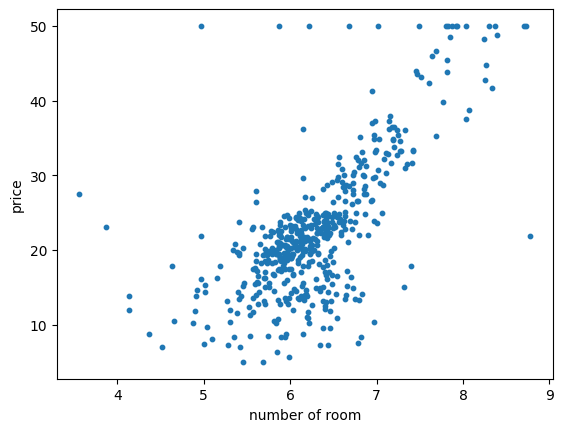

In [19]:
## data set ##

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x_ord g = np.hstack([raw_df.values[::2,:], raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

print(f'원본데이터:{x_org.shape}, {yt.shape}')
print(f'항목명:{feature_names}')
print('-----------------------------------------------')

## 입력 데이터 추출 ##

x = x_org[:,feature_names=='RM']
print(f'추출 후: {x.shape}')
print(x[:5,:])

print('정답데이터:')
print(yt[:5])

## 산포도 출력 ##

plt.scatter(x, yt, s=10)
plt.xlabel('number of room')
plt.ylabel('price')
plt.show()

모델 정의 

In [20]:
## 변수 정의 ##

n_input  = x.shape[1]
n_output = 1
print(f'입력 차원수:{n_input} 출력 차원수:{n_output}')

입력 차원수:1 출력 차원수:1


In [21]:
## 모델 클래스 정의 ##


class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()

        self.l1 = nn.Linear(n_input, n_output)

        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)
    
    def forward(self, x):
        return x1



이진분류

In [70]:
## data load ##

from sklearn.datasets import load_iris

iris = load_iris()
x_org, y_org = iris.data, iris.target
print(f'원본 데이터:{x_org.shape}, {y_org.shape}')

x_data = iris.data[:100,:2]
y_data = iris.target[:100]
print(f'대상 데이터:{x_data.shape}, {y_data.shape}')

원본 데이터:(150, 4), (150,)
대상 데이터:(100, 2), (100,)


In [71]:
## data split ##

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30, random_state=123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(70, 2) (30, 2) (70,) (30,)


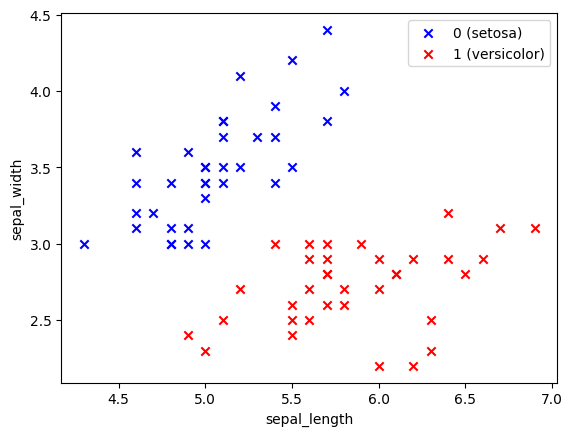

In [72]:
## scatter ##

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='x', c='r', label='1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [73]:
## input/output dimension ## 

n_input = x_train.shape[1]
n_output = 1
print(f'n_input:{n_input}  n_output:{n_output}')

n_input:2  n_output:1


In [74]:
## model ## 

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.sigmoid = nn.Sigmoid()

        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self,x):
        x1 = self.l1(x) # 선형함수에 입력값을 넣고 계산한 결과 
        x2 = self.sigmoid(x1) # 결과에 시그모이드 함수를 적용 
        return x2
net = Net(n_input, n_output)


from torchinfo import summary
## summary ##
print(net)
summary(net, (2,))


Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
├─Sigmoid: 1-2                           [1]                       --
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [75]:
## 알고리즘 및 손실 함수 정의 ##

import torch.optim as optim 

criterion = nn.BCELoss() # 손실함수 
lr=0.01 # 학습률
optimizer = optim.SGD(net.parameters(),lr=lr) # 최적화 함수: 경사 하강법 


In [76]:
## input/output 텐서 변환 ##

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float() 
labels1 = labels.view((-1,1))

inputs_test = torch.tensor(x_test).float() 
labels_test = torch.tensor(y_test).float()
labels1_test = labels_test.view((-1,1))

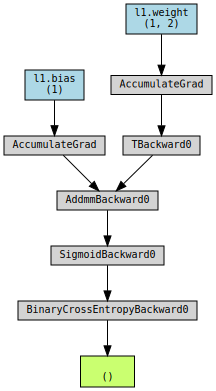

In [77]:
from torchviz import make_dot

outputs = net(inputs) # 예측 계산
loss = criterion(outputs, labels1) # 손실 계산
g = make_dot(loss, params=dict(net.named_parameters())) # 손실을 계산 그래프로 출력
display(g)

In [78]:
## 초기화 처리 ##
lr = 0.01 # 학습률 
net = Net(n_input, n_output) # 초기화 
criterion = nn.BCELoss() # 손실 함수 : 교차 엔트로피 함수 
optimizer = optim.SGD(net.parameters(), lr=lr) # 최적화 함수 : 경사 하강법
num_epochs = 10000
history = np.zeros((0,5)) # 기록용 리스트 초기화 


In [79]:
## 반복 계산 메인 루프 ## 


for epoch in range(num_epochs):
    # 훈련 페이즈
    
    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels1)

    # 경사 계산
    loss.backward()
    
    # 파라미터 수정
    optimizer.step()

    # 손실 저장(스칼라 값 취득)
    train_loss = loss.item()

    # 예측 라벨(1 또는 0) 계산
    predicted = torch.where(outputs < 0.5, 0, 1)
    
    # 정확도 계산
    train_acc = (predicted == labels1).sum() / len(y_train)

    # 예측 페이즈

    # 예측 계산
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels1_test)

    # 손실 저장(스칼라 값 취득)
    val_loss =  loss_test.item()
        
    # 예측 라벨(1 또는 0) 계산
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)

    # 정확도 계산
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)
    
    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))


Epoch [0/10000], loss: 4.77289 acc: 0.50000 val_loss: 4.49384, val_acc: 0.50000
Epoch [10/10000], loss: 3.80546 acc: 0.50000 val_loss: 3.56537, val_acc: 0.50000
Epoch [20/10000], loss: 2.84328 acc: 0.50000 val_loss: 2.64328, val_acc: 0.50000
Epoch [30/10000], loss: 1.91613 acc: 0.50000 val_loss: 1.76244, val_acc: 0.50000
Epoch [40/10000], loss: 1.17137 acc: 0.50000 val_loss: 1.08537, val_acc: 0.50000
Epoch [50/10000], loss: 0.84140 acc: 0.50000 val_loss: 0.81872, val_acc: 0.50000
Epoch [60/10000], loss: 0.77087 acc: 0.50000 val_loss: 0.77093, val_acc: 0.50000
Epoch [70/10000], loss: 0.75450 acc: 0.34286 val_loss: 0.76105, val_acc: 0.33333
Epoch [80/10000], loss: 0.74542 acc: 0.25714 val_loss: 0.75447, val_acc: 0.20000
Epoch [90/10000], loss: 0.73734 acc: 0.24286 val_loss: 0.74778, val_acc: 0.16667
Epoch [100/10000], loss: 0.72949 acc: 0.24286 val_loss: 0.74098, val_acc: 0.13333
Epoch [110/10000], loss: 0.72180 acc: 0.27143 val_loss: 0.73419, val_acc: 0.16667
Epoch [120/10000], loss: 0.

In [80]:
## 결과 확인 ##

print(f'초기상태 : 손실 : {history[0,3]:.5f} 정확도 : {history[0,4]:.5f}')
print(f'최종상태 : 손실 : {history[-1,3]:.5f} 정확도 : {history[-1,4]:.5f}')


초기상태 : 손실 : 4.49384 정확도 : 0.50000
최종상태 : 손실 : 0.15395 정확도 : 0.96667


c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\

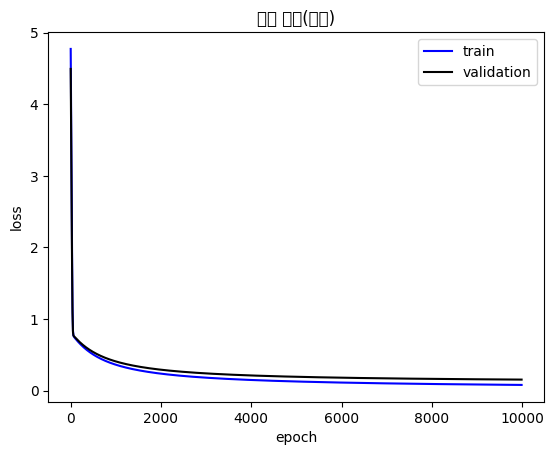

In [83]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b', label='train')
plt.plot(history[:,0], history[:,3], 'k', label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('학습 곡선(손실)')
plt.legend()
plt.show()

c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\.conda\envs\ex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


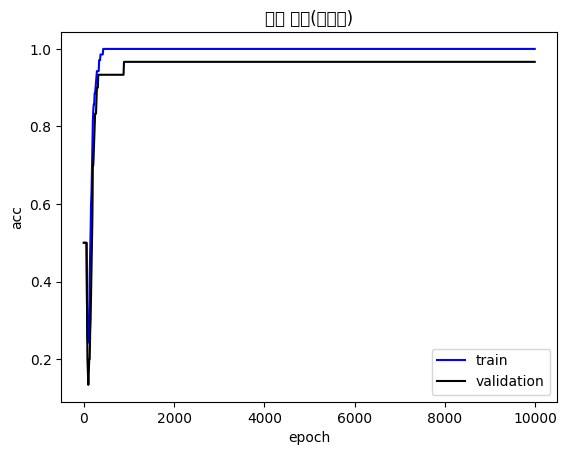

In [84]:
# 학습 곡선 출력(정확도)

plt.plot(history[:,0], history[:,2], 'b', label='train')
plt.plot(history[:,0], history[:,4], 'k', label='validation')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('학습 곡선(정확도)')
plt.legend()
plt.show()

BIAS = [0.33861205], WEIGHT = [[ 2.9700332 -5.3000164]]
xl = [4.4 7. ]  yl = [2.52956915 3.98656205]


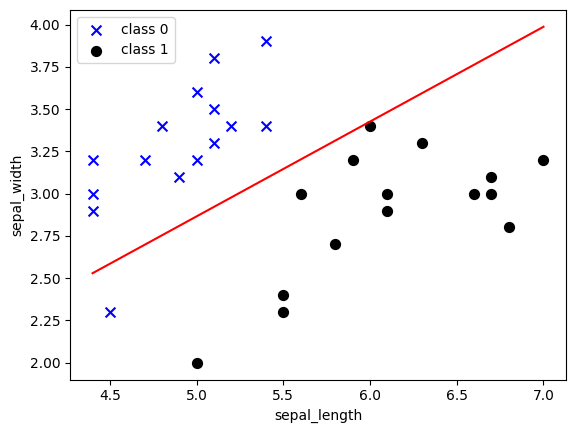

In [89]:
# 검증 데이터 준비

x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# 파라미터 취득

bias = net.l1.bias.data.numpy()
weight = net.l1.weight.data.numpy()
print(f'BIAS = {bias}, WEIGHT = {weight}')

# 결정 경계를 그리기 위해 x1로부터 x2를 계산
def decision(x):
    return(-(bias + weight[0,0] * x)/ weight[0,1])

# 산포도의 x1의 최솟값과 최댓값
xl = np.array([x_test[:,0].min(), x_test[:,0].max()])
yl = decision(xl)

# 결과 확인
print(f'xl = {xl}  yl = {yl}')

#산포도 출력
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', s=50, label='class 0')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', s=50, label='class 1')
plt.plot(xl, yl, c='r')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()